<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Esmeralda Rodríguez Rodríguez, Santiago Romero Riggen.

**Fecha:** 22 de junio del 2021.

**Expediente** : 709288, 715099.

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [Link con el enlace del repositorio del creador del proyecto](https://github.com/anarodriguezrod/Tarea6_ARodriguez_SRomero)

# Tarea 6: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
   
Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [34]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import optimize
import random
from scipy import optimize
import pandas as pd

#### Ejercicio 1: Ana Rodríguez

El máximo de f es: [1.875]


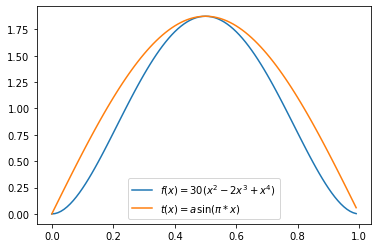

In [35]:
# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) #maximo de la función f
# Función t 
t = lambda x: a*np.sin(np.pi*x) #función t

# Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',a)

# Gráficas de las funciones
plt.plot(x,f(x),label='$f(x) = 30(x^{2}-2x^{3}+x^{4})$')
plt.plot(x,t(x),label='$t(x) = a\sin(\pi*x)$')
plt.legend()

En la gráfica observamos que   $t(x)\geq f(x)$.

#### Ejercicio 2: Ana Rodríguez

Sabemos que $g(x)=\frac{t(x)}{c}$.   
Sabemos que es una función de densidad por que su función acumulada $G(x) = 1 $.  
Y anteriormente asumimos que $c = \int_{0}^{1} t(x) dx$.  
Por lo tanto para este caso en donde $t(x) = a \sin(\pi x)$:   
$$c = \int_{0}^{1}a \sin(\pi x)$$
Resolvemos:
$$\int_{0}^{1}a \sin(\pi x) = -\frac{a\cos(\pi x)}{\pi}$$
Evaluando:
$$-\frac{a\cos(\pi 1)}{\pi}-(-\frac{a\cos(\pi 0)}{\pi}) = \frac{a}{\pi}+\frac{a}{\pi}$$
Por lo tanto:
$$c = \frac{2a}{\pi}$$
Ahora vemos que:
$$g(x) = \frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$
Y obtenemos:
$$g(x) = \frac{\pi\sin(\pi x)}{2}$$

#### Ejercicio 3: Ana Rodríguez

Para sacar la transformada inversa necesitamos la función de probabilidad acumulada que obtenemos $G(x) = \int_{-\infty}^{\infty}g(x)dx$.
Acotamos la integral de 0 a :  $G(x) = \int_{0}^{x}g(x)dx$.

Por lo tanto tenemos:
$$G(x) = \int_{0}^{x}\frac{\pi\sin(\pi x)}{2}dx$$

Usando el mêtodo de sustitución: $u = \pi x, \frac{du}{dx}=\pi, dx = \frac{1}{\pi}du$

$$\frac{1}{2} \int_{0}^{x} \sin(u)du = -\frac{\cos(u)}{2}$$

Sustituyendo a la variable original y evaluando:

$$-\frac{\cos(\pi x)}{2} = -\frac{\cos(\pi x)}{2} - (-\frac{\cos(\pi 0)}{2})$$

Obtenemos:
$$G(x) = -\frac{\cos(\pi x)- 1}{2} $$

Para calcular su función inversa (para obtener la función que distribuye como $g(x)$):
1. Igualar $G(x)=U$
$$-\frac{\cos(\pi x)- 1}{2} = U$$ 

2. Despejar $x = G^{-1}(U)$
$$\cos(\pi x)=1-2U$$ 
Aplicamos identidades trigonométricas inversas
$$\pi x = \arccos(1-2U)$$
Y por último:
$$ x = \frac{\arccos(1-2U)}{\pi}$$

#### Ejercicio 4: Ana Rodríguez

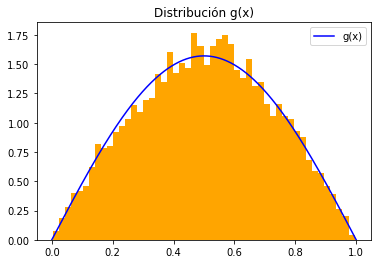

In [36]:
def Dist_2(N: 'Cantidad de datos que generar'):
    '''Con esta función puedo generar variables aleatorias que distribuyen como g(x)'''
    U = np.random.rand(N)
    y = (np.arccos(1-2*U))/np.pi #La función inversa que obtuve
    return y 

# Comparar 
x = np.arange(0,1,0.0001)
y2 = (np.pi*np.sin(np.pi*x))/2 #función g(x)
plt.plot(x,y2,'b', label = 'g(x)')

N = 10000
y = Dist_2(N) 

plt.hist(y, bins = 50, density = True, color = 'orange')
plt.title('Distribución g(x)')
plt.legend()
plt.show()

#### Ejercicio 5: Ana Rodríguez

In [37]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show() #devuelve la grafica
    
    x = [R1[i] for i in range(len(R1)) if condition[i]] 
    return x  #devuelve los valores que acepto

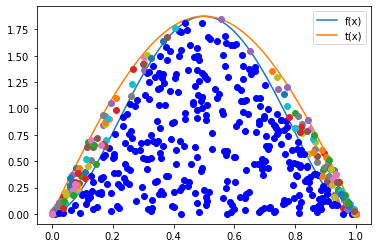

In [38]:
x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) #entre el dominio (en este caso 0 y 1)

x_r = Acep_rechazo(R2, R1, f, t)

#### Ejercicio 6: Ana Rodríguez

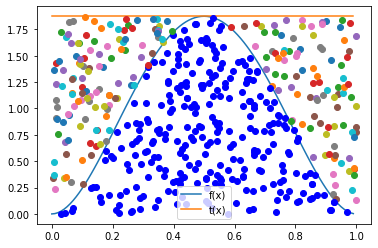

In [39]:
# Generar los puntos con t(x) constante
# Función t -> Función constante
t_c = lambda x: a * np.ones([len(x)])

x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t_c(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) #entre el dominio (en este caso 0 y 1)

x_r_c = Acep_rechazo(R2, R1, f, t_c)

In [40]:
# Cantidad de puntos aceptados 
senoidal= len(x_r)
constante = len(x_r_c)

senoidal, constante

(332, 280)

Conclusion. Se aceptaron más puntos con la función senoidal por que se generan mas reducidos los puntos en este dominio. Aunque es mas sencillo definir una t(x) constante es mejor utilizar una función que acote de mejor manera nuestra f(x), pues nos dará una mayor cantidad de puntos aceptados.

#### Ejercicio 7: Ana Rodríguez

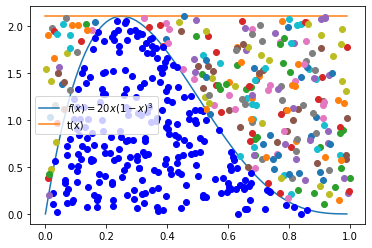

In [41]:
# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) #con optimize encuentro los puntos criticos *no hay funcion maximo, asu qie le pongo -f(x) (lo necesito para g(x)). disp=False: que no me muestre 
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)]) #generar un numero depende del vector que yo le meta

x = np.arange(0, 1, 0.01) # Rango donde se graficará las funciones (entre 0 y 1, con pasos de 0.1)

# Gráficas de las funciones
plt.plot(x,f(x),label='$f(x) = 20x(1-x)^{3}$')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size = N) 

x_r_7 = Acep_rechazo(R2, R1, f, t)

#### Ejercicio 8: Ana Rodríguez

Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

Queremos comprobar que   $p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$.  
$$\frac{p_{i+1}}{p_i}=\frac{\frac{n!}{(i+1)!(n-(i+1))!}p^{i+1}(1-p)^{n-(i+1)}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}}$$

Con división de fracciones:

$$\frac{p_{i+1}}{p_i}=\frac{n!p^{i+1}(1-p)^{n-i-1}i!(n-i)!}{n!p^i(1-p)^{n-i}(i+1)!(n-i-1)!}$$

$$=\frac{p^{i+1-i}(1-p)^{n-i-1-n+i}i!(n-i)!}{(i+1)!(n-i-1)!}=\frac{p(1-p)^{-1}i!(n-i)!}{(i+1)!(n-i-1)!}$$

Con la propiedad de los factoriales (con $n = i, n = (n-i)$):
$$\frac{p(1-p)^{-1}(n-i)}{(i+1)}$$

Y por último:
$$\frac{p(n-i)}{(i+1)(1-p)}$$

Por lo tanto:
$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)}{(i+1)(1-p)}$$

$$p_{i+1} = \frac{p(n-i)}{(i+1)(1-p)}p_i$$

Lo que demuestra la validez de la ecuación planteada.

Que la ecuación sea recursiva, nos ayuda a que el costo computacional de su solución sea menor, ya que no es necesario hacer los cálculos de los factoriales que son operaciones iterativas.

#### Ejercicio 9: Ana Rodríguez

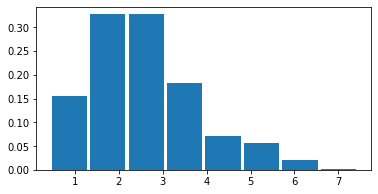

In [42]:
# Función que calcula la probabilidad acumulada optimizada
def probabilidad_poisson(n2,lamba):
    proba_poisson = np.zeros(n2) 
    proba_poisson[0] = np.exp(-lamba) 
    def pois(i2):
        nonlocal proba_poisson
        proba_poisson[i2+1]=(lamba/(i2+1))*proba_poisson[i2]
    [pois(i2) for i2 in range(n2-1)]
    return np.cumsum(proba_poisson)

n2 = 10; lamba = 2; N2 = 10**4

poisson_acumulado= probabilidad_poisson(n2,lamba)
u2 = np.random.rand(N2)

# Usando el método de la transformada inversa
d_binomial2 = distribucion_discreta(u2,poisson_acumulado)
histograma_discreto(d_binomial2)

#### Santiago Romero

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy import optimize
import numpy as np

Máx de la funciones: 1.875


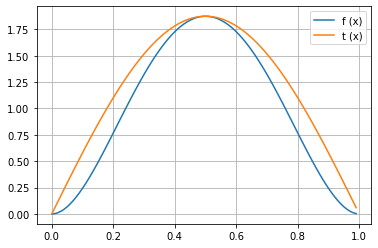

In [13]:
# 1
def f(x):
    return 30*(x**2 - 2*x**3 + x**4)

# Encontrar máx de f
maxf = float(f(optimize.fmin(lambda x: -f(x), 0, disp=False)))
f_x = list(map(f,x))

#Función cnste
def t(x):
    return maxf * np.sin(x * np.pi)
t_x = list(map(f,x))

#Rango
x = np.arange(0, 1, .01)

# Gráfica
plt.plot(x, f(x), label='f (x)')
plt.plot(x, t(x), label='t (x)')
plt.grid()
plt.legend()
print('Máx de la funciones:', maxf)

Se cumple que t(x) >= f(x)

#### 2
Definimos c

c = $\int_\infty^\infty t(x) dx$

Integramos y evaluamos:
$$x = \frac{π sin(πx)}{2}$$

#### 3
Se integra la función g(x)

g(x) = $\int_0^x \frac{π sin(πx)}{2}$

Se iguala y despeja 

$$x = \frac{cos^-1 * (-2u + 1)}{π}$$

In [5]:
#4
x = np.arange(0,1,.01)

def f(x):
    return 30*(x**2 - 2*x**3 + x**4)
def g(u):
    return np.pi / 2 * np.sin(np.pi * u)
def t(x):
    return maxf * np.sin(x * np.pi)

In [6]:
n = 10**4
R2 = np.random.rand(n)
u= np.random.uniform(0, 1, n)
R1 = (np.arccos(-2*u + 1)) / (np.pi)

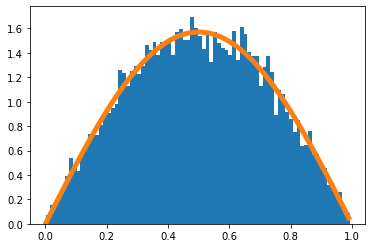

In [7]:
plt.hist(R1, 80, density = True)
plt.plot(x, g(x), lw=5)
plt.show()

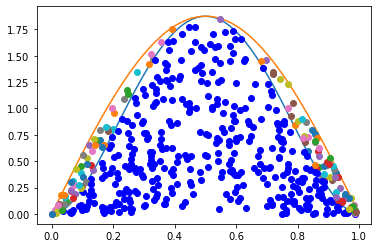

In [8]:
#5
def Acep_rechazo(R2:'V distribuidas U(0,1)',
                 R1: 'V distribuidas como g(x)',
                 f:'Func objetivo',
                 t: 'Fuc mayor a f'):
    
    f_x = f(R1)
    t_x = t(R1)
    condicion = R2* t_x <= f_x
    [plt.plot(R1[i], R2[i] * t_x[i], 'ob') if condicion[i] else plt.plot(R1[i], R2[i]*t_x[i], 'o') 
        for i in range(len(R1))]
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condicion[i]]
    y = len(condicion[condicion == True]) / len(condicion)
    return x, y

x = np.arange(0,1,.01)

plt.plot(x, f(x))
plt.plot(x, t(x))
R1 = np.random.rand(500)
R2 = np.random.rand(500)
y = Acep_rechazo(R2, R1, f, t)
plt.show()

In [28]:
#6
print('Porcentaje de aceptación:', y[1]*100,'%')

Porcentaje de aceptación: 48.6 %


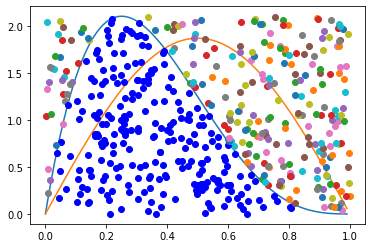

In [11]:
#7
n =500
def f(x):
    return 20*x * (1-x)**3

x = np.arange(0,1,.01)
y = lambda x: np.max(f(x)) * np.ones([len(x)])

plt.plot(x, f(x))
plt.plot(x, t(x))
R1 = np.random.rand(500)
R2 = np.random.rand(500)

y = Acep_rechazo(R2, R1, f, y)
plt.show()

8

Demostrar:
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

Por propiedades:
$$k! = k(1+k)!$$

$$\frac{k!}{k(1+k)!} = k(1+k)!$$

Queda como:
$$P(k+1) = \frac{\lambda}{(1+k)}*P(k)$$

No handles with labels found to put in legend.


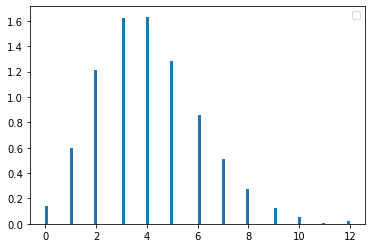

In [29]:
# 9
def poisson(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1] = l / (i+1) * Pr[i]
        
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)
        
n = 12
l = 4
n2 = 10000

p_acum = poisson(n,l)
u = np.random.rand(n2)

plt.figure()
plt.subplot()
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(n2)))
plt.hist(d_pois, 100, density=True)
plt.legend()